Got the dataset from: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

"The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011). 

A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. 

While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.

For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing."

This information is important as it could be used to reveal which if any feature can effects the hourly electrical output of a plant, and thereby be used to improve the energy consumption of power plants.

# Import Libraires:

In [24]:
import pandas as pd 
import numpy as np

# Import Dataset:

In [25]:
#Read the dataset file using pandas library:
df = pd.read_csv('CCPPD.csv')

Check that the dataset has been sucseffuly imported:

In [26]:
#Call the first 5 rows in the dataset:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


The features are:

(T) - hourly average ambient variables Temperature

(AP) - Ambient Pressure

(RH) - Relative Humidity

(V) - Exhaust Vacuum

These features will be used to predict (PE) - the net hourly electrical energy output of the plant

# Check data shape and relationship:

In [27]:
#Check the shape of the dataset using '.shape':
df.shape

(9568, 5)

This tells you how the data is presented in the file. 

It states that there are 9568 rows and 5 columns.

This means that there are 9568 entries containing information regarding the power plant.

Get more info on dataset using '.info()' function:

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


Shows that all the varaibles are floats.

If they were not, we would have to use the encoding process, which gives numerical values to categorical data using '.replace' and 'inplace' functions.

Next, check if there are any missing data using the '.isnull()' and '.sum()' functions:

In [29]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

This shows there are no missing values in the dataset.

If there was, we wouldn't be able to make accurate predictions.

We could replace the missing values with fake values but it would not be as accurate as if they were actually there.

Luckly, we have no missing data.

We can also use 'corr()' can state if and how correlated the data are:

In [30]:
print(df.corr())

          AT         V        AP        RH        PE
AT  1.000000  0.844107 -0.507549 -0.542535 -0.948128
V   0.844107  1.000000 -0.413502 -0.312187 -0.869780
AP -0.507549 -0.413502  1.000000  0.099574  0.518429
RH -0.542535 -0.312187  0.099574  1.000000  0.389794
PE -0.948128 -0.869780  0.518429  0.389794  1.000000


This shows that there are some strong and weak positive and negative correlations between the data.

We are mainly interested in how the 4 features relate to the last feature (PE)

# Define x (independent variables) and y (dependent variable) axis:

We need to get all the independent varaibles (AT, V, AP and RH).

To do that, we drop the column we don't want using the '.drop' function, and assign the values into a varaible called 'x':

In [31]:
x = df.drop(['PE'], axis = 1).values

Now, we just need the dependent varaible, the one we are trying to predict.

To do that, we assign all the values in the dependent varaible (PE) into a variable called 'y':

In [32]:
y = df['PE'].values

The 'x' and 'y' axis have now been defined.

We can check if the values have been correctly allocated into 'x' and 'y' by viewing them:

In [33]:
print(x)
print(y)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]
[463.26 444.37 488.56 ... 429.57 435.74 453.28]


# Split data into training and testing data set:

Using the function 'train_test_split' from the 'scikit' website:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=sklearn.model#sklearn.model_selection.train_test_split

In [34]:
#Importing the 'train_test_split' function from sklearn:
from sklearn.model_selection import train_test_split

Put 'x' and 'y' variables into the 'train_test_split' function by dividing them into:

'x_train', 'x_test'

and 

'y_train', 'y_test'

Use 'test_size' function to define the percentage of training and testing dataset we want to divide our dataset into (80% of the data is for training the model, and 20% of the data is for testing the model).

Assign 'random_state' to '0' to ensure the results are consistant/the same

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Linear Regression:

The LR equation with one dependent and one independent variable is defined by the formula:

y = a + b * x 

y = the dependent variable (what we are trying to predict)

a = the intercept

b = regression coefficient (the slope)

x = the independent variable


The LR equation with one dependent and multiple independent variables is defined by the formular:

The equation: y = b0 + b1 * x1 + b2 * x2 + b3 * x3 ... + bn * xn

y = the dependent variable (what we are trying to predict)

x = the dependent variables

b = where the line starts

bn * xn = coefficients (instead of 'a * x')

Using this equation adds more slope (b) values. Instead of it describing a 'line', it describes a 'plane'.

Whatever value we add increases our slope by x * that value:

if we have:

y = b0 + 17,000 * x1 + b2 * x2 + b3 * x3 ... + bn * xn, then our slope 17,000 bigger

### Train the LR model on the training data:

Use the 'LinearRegression' function to call the LR model, abtained this from the 'scikit' website:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression

In [36]:
#Import the 'LinearRegression' model from sklearn:
from sklearn.linear_model import LinearRegression

#Next, create an object of 'LinearRegression' class:
LR = LinearRegression()

#Then fit the training data that was split above into the 'LR' object we just created:
LR.fit(x_train, y_train)

LinearRegression()

### Predict the test results:

We now need to check if we are getting accurate results from the model:

To do this, we need to call the '.predict' function.

In [37]:
#Using '.predict' allows us to call the data in 'x_test' into the 'LR' class to predict 'PE':
LR_y_prediction = LR.predict(x_test)

#Call the varaible that stores the prediction values:
LR_y_prediction

array([431.42761597, 458.56124622, 462.75264705, ..., 469.51835895,
       442.41759454, 461.88279939])

In order to see it more clearly, we can use the values of our 'x' varaible from the first rows of the dataset, and evaluate how close it is from the actual outcome:

To do this, copy the values from the first row of four columns from table above, and place them into the prediction function

In [38]:
LR.predict([[14.96, 41.76, 1024.07, 73.17]])

array([467.29723807])

The actual value from the table above is: 463.26

The predicted value from the model is: 467.29

As we can see, the predicted results do not exactly match the actual results, but they are close enough.

The predicted results are clearly not completly accurate, however, they are very close to the actual value

### Evaluate LR model:

Use the 'r2_score' function to  further evaluate how accurate the model and the predicted values are, abtained this from the 'scikit' website:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html?highlight=r2_score#sklearn.metrics.r2_score

In [39]:
from sklearn.metrics import r2_score

r2_score(y_test, LR_y_prediction)

0.9325315554761303

It shows that the r2 score is 93% which is a good score.

A model with an r2 score greater than 0.8 which means that the model can be used to solve multiple linear regression.

### Visualise the results by plotting them:

Use a scatter plot to do this, using 'matplotlib', obtained from the 'matplotlib' website:

https://matplotlib.org/stable/plot_types/basic/scatter_plot.html#sphx-glr-plot-types-basic-scatter-plot-py

Text(0.5, 1.0, 'LR Actual vs Predicted Results')

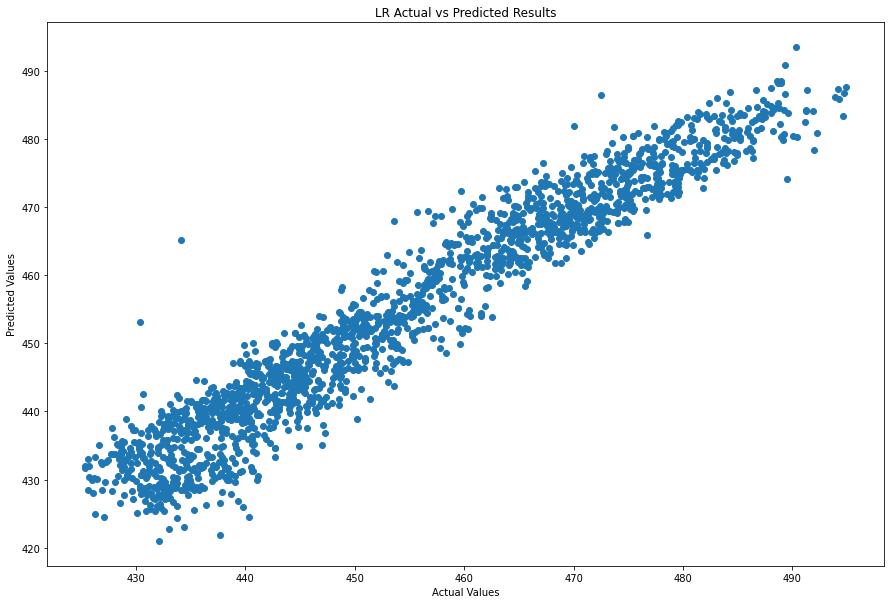

In [40]:
import matplotlib.pyplot as plt

#To set the size of the diagram:
plt.figure(figsize = (15, 10))

#Plot a scatter diagram for 'y_test' and 'y_prediction' (actual vs predicted):
plt.scatter(y_test, LR_y_prediction)

#Label the axis:
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

#Title the diagram:
plt.title('LR Actual vs Predicted Results')

The results from the diagram show us that the actual and predicted values correlate really well, with a few exceptions, which shows that our model provides very accurate prediction values.

### Difference between actual and predict LR values:

Next, we will print the difference bewteen the actual and predicted values calculated by the model:

In [41]:
#Put the values in a dataframe:
#Show the difference between the actual values and predicted values:
LR_pred_y_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': LR_y_prediction, 'Difference': y_test - LR_y_prediction})

#Only show the first 20 values:
LR_pred_y_df[0:20]

,Actual Values,Predicted Values,Difference
0,431.23,431.427616,-0.197616
1,460.01,458.561246,1.448754
2,461.14,462.752647,-1.612647
3,445.90,448.595962,-2.695962
4,451.29,457.870777,-6.580777
5,432.68,429.693839,2.986161
6,477.50,473.041853,4.458147
7,459.68,456.508363,3.171637
8,477.50,474.340491,3.159509
9,444.99,446.343029,-1.353029


From this table, we can see that the model is not 100% accurate, however, they are very close.

This shows that this model is a strong prediction model, however, there are methods that we can use to further improve this model.

## Measuring LR model accuracy:

After exploring, training and looking at our model predictions - our final step is to evaluate the performance of our multiple linear regression.

We want to understand if our predicted values are too far from our actual values.

The predicted varaibles can be used to compare the predcted vs actual values and can help to measure the accuracy of the model

There are several methods that can be used to measure the accuracy of the prediction, however, we will be calculating the MAE, MSE and RMSE metrics, obtained from 'scikit' website:

Mean Absolute Error (MAE):

When we subtract the predicted values from the actual values, obtaining the errors, sum the absolute values of those errors and get their mean.

This metric gives a notion of the overall error for each prediction of the model, the smaller (closer to 0) the better.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html?highlight=mean_absolute_error#sklearn.metrics.mean_absolute_error


Mean Squared Error (MSE):

Similar to the MAE metric, but it squares the absolute values of the errors.

Also, as with MAE, the smaller, or closer to 0, the better.

The MSE value is squared so as to make large errors even larger. 

It can be a hard metric to interpret due to the size of its values and the fact that they aren't in the same scale of the data.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html?highlight=mean_squared_error#sklearn.metrics.mean_squared_error


These metrics take the actual values and predicted values to calculate the accuracy measures.

In [78]:
#Import the necessary modules for calculating the r2_score and MSE:
from sklearn.metrics import r2_score, mean_squared_error

In [79]:
#To predict the values of the test data by calling the '.predict' function:
#Insert the predicted values of the testing and training data:
y_pred_test = LR.predict(x_test)
y_pred_train = LR.predict(x_train)

### R2

We can use 'numpy' to dig further into what is happening to our model as it measures the model in a different way.

It doesn't consider our individual data values such as MSE, RMSE and MAE, but takes a more general approach to the error, the R2. It quantifies how much of the variance of the dependent variable is being explained by the model.

It exaplins how much of the data is being explained by the model

Obtained from the 'scikit' website:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html?highlight=r2%20score#sklearn.metrics.r2_score

The calculation:

R2 = 1 - E(Actual- Predicted)2 / E(Actual - Actual Mean)2

The R2 doesn't tell us about how far or close each predicted value is from the real data - it tells us how much of our target is being captured by our model.

In other words, R2 quantifies how much of the variance of the dependent variable is being explained by the model.

The R2 metric varies from 0% to 100%.

The closer to 100%, the better.

If the R2 value is negative, it means it doesn't explain the target at all.

We can calculate R2 using a Python library:

In [80]:
#Run the r2_score for the training data:
np.abs(r2_score(y_train, y_pred_train))

0.9277253998587901

This expalins that the model fits 92% of the dataset.

We will also check the r2 score of the test data:

In [81]:
#Run the r2_score for the testing data:
np.abs(r2_score(y_test, y_pred_test))

0.9325315554761303

Similarly to the training data, this shows that the model fits  93% of the dataset.

### MSE:

It measures the amount of error in statistical models and assesses the average squared difference between the observed and predicted values.

In [84]:
#Use the MSE metric to evaluate the model on the training data, the smaller, or closer to 0, the better:
mean_squared_error(y_train, y_pred_train)

21.02639182338584

In [85]:
#Use the MSE metric to evaluate the model on the testing data, the smaller, or closer to 0, the better:
mean_squared_error(y_test, y_pred_test)

19.733699303497644

The results from this metric shows that the model is making errors when predicting an outcome using both the training and testing data. These errors are also evident in the differences between the actual outcomes compared to the predicted outcomes.

### MAE:

It measures accuracy for continuous variables and tells us how big of an error we can expect from the forecast on average.

In [83]:
#First import the metric:
from sklearn.metrics import mean_absolute_error

#Use the MAE metric to evaluate the model on the training data, the smaller, or closer to 0, the better:
mean_absolute_error(y_train, y_pred_train)

3.6402793605392874

In [86]:
#Use the MAE metric to evaluate the model on the testing data, the smaller, or closer to 0, the better:
mean_absolute_error(y_test, y_pred_test)

3.566564655203826

The results above show that the model does make errors when predicting outcomes but not too much as the value is close to 0.

### RMSE:

We can now calculate the root mean squared error 'RMSE' to measure average error that the model makes when predicting the outcome.

The smaller the number, the more accurate the model is at predicting:

In [46]:
np.sqrt(mean_squared_error(y_train, y_pred_train))

4.585454374801459

We can see that the value of the RMSE is 4.58, which means that our model might get its prediction adding or subtracting 4.58 from the actual value, which could be why the prediction values and the actual values are slighly off.

It would be better to have this error closer to 0, but 4.44 is a small number - this indicates that our model might be predicting very well.

We do the same for the test data:

In [47]:
np.sqrt(mean_squared_error(y_test, y_pred_test))

4.44226285844249

Similarly to the train data, the RMSE is 4.44, which could explain why the prediction values and the actual values are slighly off.

It shows that the prediction numbers are quite accurate.

### Evaluation:

The results above show that this model is a good model which can be used in prediction as the predicted values closely match the acutal values.

The accuracy measures shows that the model explains 92% of the train data, and 93% of our test data, which is important to get right than our train data as it shows that it is fitting the train data and the test data very well.

With these results, it can be said that this model can be used to predict the hourly electrical output of the plant (PE) using the features:

(T) - hourly average ambient variables Temperature

(AP) - Ambient Pressure

(RH) - Relative Humidity

and

(V) - Exhaust Vacuum

Next we will use the 'Lasso' model to predict values using the imported dataset, and compare them to those produced by the 'Linear Regression' model:

# Lasso Regression:

The equation for Lasso is:

Residual Sum of Squares + λ * (Sum of the absolute value of the magnitude of coefficients)


Where, 

λ denotes the amount of shrinkage.

λ = 0 implies all features are considered and it is equivalent to the linear regression where only the residual sum of squares is considered to build a predictive model

λ = ∞ implies no feature is considered i.e, as λ closes to infinity it eliminates more and more features

The bias increases with increase in λ

Variance increases with decrease in λ

### Train the Lasso model on the training data:

Use the 'Lasso' function to call the Lasso model, abtained this from the 'scikit' website:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html?highlight=lasso#sklearn.linear_model.Lasso

In [48]:
#Import the 'Lasso' model from sklearn:
from sklearn.linear_model import Lasso

#Next, create an object of 'Lasso' class:
lasso = Lasso()

#Then fit the training data that was split above into the 'lass' object we just created:
lasso.fit(x_train, y_train)

Lasso()

### Predict  test results:

As we did with the LR model, we need to check if we are getting accurate results from the model:

To do this, we can call the '.predict' function as before.

In [49]:
#Using '.predict' allows us to call the data in 'x_test' into the 'lass' class to predict 'PE':
lass_y_prediction = lasso.predict(x_test)

#Call the varaible that stores the prediction values:
lass_y_prediction

array([431.48023627, 458.60026942, 463.01929187, ..., 469.3756746 ,
       442.867041  , 462.10859983])

The results seem to be similar to those of the LR model, with this model having slightly higher results:

LR - 431.42, 458.56, 462.75, ..., 469.51, 442.41, 461.88

Lass - 431.48, 458.60, 463.01, ..., 469.37, 442.86, 462.10

However, this may not be an indication that Lasso may be the better model.

We will next use the values from our 'x' varaible from the first rows of the dataset, and evaluate how close it is from the actual outcome:

To do this, copy the values from the first row of four columns from table above, and place them into the prediction function

In [50]:
lasso.predict([[14.96, 41.76, 1024.07, 73.17]])

array([467.12353453])

Similary, Lasso has higher values than the ones predicted by LR:

LR - 467.27

Lass - 467.12

Actual - 463.26

It would appear that the prediction made by the Lasso model is slightly closer to the actual values than the prediction made by the LR model

## Evaluate Lasso model:

### R2 test:

In [51]:
r2_score(y_test, lass_y_prediction)

0.9322987861931235

The r2 score for this model is: 0.9322

The r2 score for the LR model was: 0.9325

That shows that the LR model captures more of the test data than the Lasso model, and that the variance of the dependent variable is being explained more by the LR model, but only just slightly.

### Visualise the results by plotting them:

Text(0.5, 1.0, 'Lasso Actual vs Predicted Results')

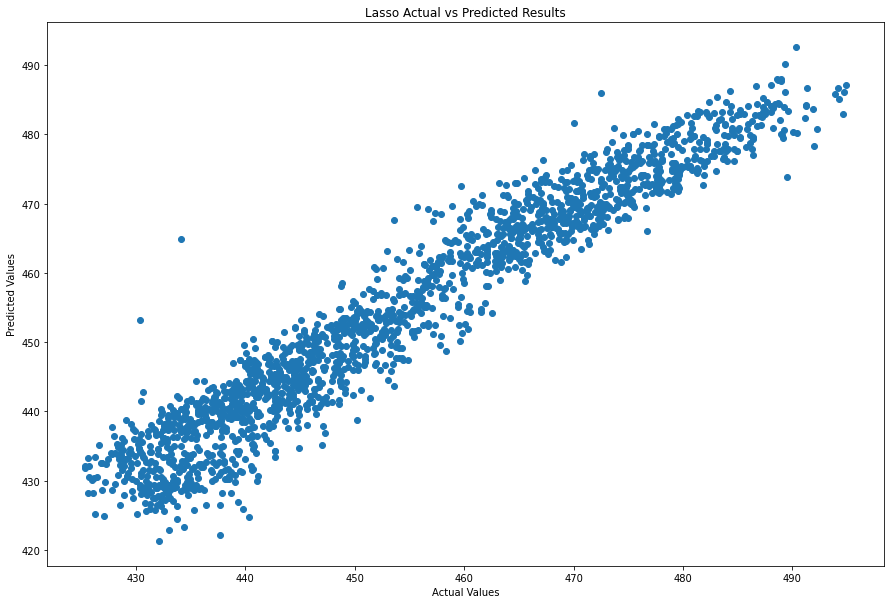

In [52]:
#Using 'matplotlib.pyplot' to plot:
#To set the size of the diagram:
plt.figure(figsize = (15, 10))

#Plot a scatter diagram for 'y_test' and 'lass_y_prediction' (actual vs predicted):
plt.scatter(y_test, lass_y_prediction)

#Label the axis:
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

#Title the diagram:
plt.title('Lasso Actual vs Predicted Results')

The results from the diagram are very similar, if not identical to that of the LR diagram.

It also shows that the predicted values match the actual values very well, also with a few exceptions.

It shows that Lasso also provides accurate predictions.

### Difference between actual and predict Lasso values:

Showing the difference between the predicted and actual values:

In [57]:
#Put the values in a dataframe:
#Show the difference between the actual values and predicted values:
lass_pred_y_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': lass_y_prediction, 'Difference': y_test - lass_y_prediction})

#Only show the first 20 values:
lass_pred_y_df[0:20]

,Actual Values,Predicted Values,Difference
0,431.23,431.480236,-0.250236
1,460.01,458.600269,1.409731
2,461.14,463.019292,-1.879292
3,445.90,448.608113,-2.708113
4,451.29,457.614501,-6.324501
5,432.68,429.738402,2.941598
6,477.50,472.733178,4.766822
7,459.68,456.528756,3.151244
8,477.50,473.998371,3.501629
9,444.99,446.775357,-1.785357


From this table, we can see that the model is not 100% accurate, however, they are very close.

Compared to the 'Predicted' values from the LR model, it would appear that the LR model has slightly less differences between the 'Predicted' and 'Actual' values compared to this model.

This shows that this model is a strong prediction model.

### Difference between actual and predict LR and Lasso values:

Lets compare both predicted values against each other:

The below shows both model's predicted values and the differences between them.

In [58]:
#Put the values in a dataframe:
#Show the difference between the actual values and predicted values:
lass_pred_y_df = pd.DataFrame({'Actual Values': y_test, 'LR Predicted Values': LR_y_prediction, 'lass Predicted Values': lass_y_prediction, 'Difference': LR_y_prediction - lass_y_prediction})

#Only show the first 20 values:
lass_pred_y_df[0:20]

,Actual Values,LR Predicted Values,lass Predicted Values,Difference
0,431.23,431.427616,431.480236,-0.052620
1,460.01,458.561246,458.600269,-0.039023
2,461.14,462.752647,463.019292,-0.266645
3,445.90,448.595962,448.608113,-0.012151
4,451.29,457.870777,457.614501,0.256276
5,432.68,429.693839,429.738402,-0.044563
6,477.50,473.041853,472.733178,0.308675
7,459.68,456.508363,456.528756,-0.020393
8,477.50,474.340491,473.998371,0.342120
9,444.99,446.343029,446.775357,-0.432329


The above table shows that there are very slight differences between the two prediction models - less than 1% difference, with both showing more accuracy than the other

## Measuring model accuracy:

Next we will measure the accuracy of the Lasso model and compare it with that of the LR model:

In [59]:
#To predict the values of the test data by calling the '.predict' function:
#Insert the predicted values of the testing and training data:
lass_y_pred_test = lasso.predict(x_test)
lass_y_pred_train = lasso.predict(x_train)

### R2 train:

Calculate the r2 score on the training data for the Lasso model:

In [60]:
#Run the r2_score for the training data:
np.abs(r2_score(y_train, lass_y_pred_train))

0.9274992054931654

The r2 score for the LR training data was: 0.9277

The r2 score for the Lasso training data is: 0.9274

The closer the r2 score is to 1.0, the better.

The results show that LR has a higher r2 score so it has the better r2 score.

It shows that the LR model fits more of the dataset than the Lasso model.

Next, we will run the score on the test data:

In [61]:
#Run the r2_score for the testing data:
np.abs(r2_score(y_test, lass_y_pred_test))

0.9322987861931235

The r2 score for the LR training data was: 0.9325

The r2 score for the Lasso training data is: 0.9322

The closer the r2 score is to 1.0, the better.

The results show that LR has a higher r2 score so it has the better r2 score.

This similarly shows that the LR model fits more of the dataset than the Lasso model.

### MSE:
It measures the amount of error in statistical models and assesses the average squared difference between the observed and predicted values.

In [91]:
#Use the MSE metric to evaluate the model on the training data, the smaller, or closer to 0, the better:
mean_squared_error(y_train, lass_y_pred_train)

21.09219711806164

In [92]:
#Use the MSE metric to evaluate the model on the testing data, the smaller, or closer to 0, the better:
mean_squared_error(y_test, lass_y_pred_test)

19.80178148725575

LR

Train: 21.02

Test: 19.73

Lass

Train: 21.09

Test: 19.80

Similarly to the LR model, the results from this metric shows that the model is making errors when predicting an outcome using both the training and testing data. These errors are also evident in the differences between the actual outcomes compared to the predicted outcomes. The results show that the LR model have lower MSE scores than the Lasso model which suggests that the LR model makes less errors than the Lasso model albeit only just slightly.

### MAE:
It measures accuracy for continuous variables and tells us how big of an error we can expect from the forecast on average.

In [93]:
#Use the MAE metric to evaluate the model on the training data, the smaller, or closer to 0, the better:
mean_absolute_error(y_train, lass_y_pred_train)

3.6481917912098933

In [94]:
#Use the MAE metric to evaluate the model on the testing data, the smaller, or closer to 0, the better:
mean_absolute_error(y_test, lass_y_pred_test)

3.5763866992074966

LR

Train: 3.640

Test: 3.567

Lass

Train: 3.648

Test: 3.576

Simialrly to the LR model, the results above show that the model does make errors when predicting outcomes but not too much as the value is close to 0. 

The results show that the LR model have lower MAE scores than the Lasso model which suggests that the LR model makes slightly less errors with the training data and slightly more errors in the testing data compared to the Lasso model.

### RMSE:

Next, we will calculate the RMSE to measure the average error that the Lasso model makes when predicting the outcome.

The smaller the number, the more accurate the model is at predicting:

In [62]:
np.sqrt(mean_squared_error(y_train, lass_y_pred_train))

4.592624208234508

The RMSE score for the LR training data was: 4.58

The RMSE score for the Lasso training data is: 4.59

Again, the smaller the number, the more accurate the model is.

It appears that the LR model has a smaller RMSE score by 0.01, making it 0.01 more accurate in predicting the training data than the Lasso model.

We will run the score on the test data:

In [63]:
np.sqrt(mean_squared_error(y_test, lass_y_pred_test))

4.449919267498653

The RMSE score for the LR training data was: 4.442

The RMSE score for the Lasso training data is: 4.449

It would appear again that the LR model has a smaller RMSE score by 0.007, making it 0.007 more accurate in predicting the test data than the Lasso model.

### Evaluation:

The results above show that the Lasso model is just as good a model as the LR model meaning it can be used in prediction as the predicted values closely match the acutal values.

The accuracy measures shows that the model explains 92% of the train data, and 93% of our test data, which is important to get right than our train data as it shows that it is fitting the train data and the test data very well.

With these results, it can be said that this model can be used to predict the hourly electrical output of the plant (PE) using the features:

(T) - hourly average ambient variables Temperature
(AP) - Ambient Pressure
(RH) - Relative Humidity
and
(V) - Exhaust Vacuum

However, since the LR model's accuracy score was higher (albeit extremly slightly), it would appear that in this instance, LR would be best used to predict the (PE) - the net hourly electrical energy output of the plant.

Similarly we will use the 'Neural Network' model to predict values using the imported dataset, and compare them to those produced by the 'Lasso' and 'Linear Regression' models:

# Neural Network

Mathematically, it takes input values and passes it through layers via a large, connected network. 

Some computation happens in those layers which then produces a desired output. 

In other words, it is a network with layers (or neurons – the data points inside each layer), where everything is connected. 

Computational functions occur, which then produce a desired output. 

Equations:

NN: 
We take the input variables and the above linear combination equation of  

Z = W0 + W1X1 + W2X2 + …+ WnXn 

to compute the output or the predicted Y values, called the Ypred.

Sigmoid Function:

Output = 1 / 1 + e-x

Error:

MSE calculation

Use the 'Neural Network' function to call the Lasso model, abtained this from the 'scikit' website:

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

### Train the NN model on the training data:

In [64]:
#Import the 'Neural Network Regressor' model from sklearn:
from sklearn.neural_network import MLPRegressor

#Next, create an object of 'MLPRegressor' class:
nn = MLPRegressor(solver='lbfgs',alpha=0.001,hidden_layer_sizes=(2),random_state=0)

#Then fit the training data that was split above into the 'nn' object we just created:
nn.fit(x_train, y_train)

MLPRegressor(alpha=0.001, hidden_layer_sizes=2, random_state=0, solver='lbfgs')

### Predict the test results:

As we did with the LR and Lasso models, we need to check if we are getting accurate results from the model.

To do this, we can similarly use the '.predict' dunction as with the other two models:

In [65]:
#Using '.predict' allows us to call the data in 'x_test' into the 'nn' class to predict 'PE':
nn_y_prediction = nn.predict(x_test)

#Call the varaible that stores the prediction values:
nn_y_prediction

array([431.34609195, 462.36566263, 465.84202336, ..., 473.11894235,
       439.83038232, 459.06845106])

The results seem slightly similar to those of the LR and Lasso models:

LR - 431.42, 458.56, 462.75, ..., 469.51, 442.41, 461.88

Lass - 431.48, 458.60, 463.01, ..., 469.37, 442.86, 462.10

NN - 431.34, 462.36, 465.84, ..., 473.11, 439.83, 459.06

However, this may not be an indication that NN may be the better model.

We will next use the values from our 'x' varaible from the first rows of the dataset, and evaluate how close it is from the actual outcome:

To do this, copy the values from the first row of four columns from table above, and place them into the prediction function:

In [66]:
nn.predict([[14.96, 41.76, 1024.07, 73.17]])

array([471.11341646])

Similary, NN has higher values than the ones predicted by LR and Lasso:

LR - 467.27

Lass - 467.12

NN - 471.10

Actual - 463.26

It would appear that the prediction made by the Lasso model is still closer to the actual values than the prediction made by this model

## Evaluate NN model:

### R2 test:

In [67]:
r2_score(y_test, nn_y_prediction)

0.915947892479207

The r2 score for this model is: 0.9159

The r2 score for the LR model was: 0.9325

The r2 score for the Lasso model was: 0.9322

That shows that the LR model captures more of the test data amongst the three models, and that the variance of the dependent variable is being explained more by the LR model.

### Visualise the results by plotting them:

Text(0.5, 1.0, 'NN Actual vs Predicted Results')

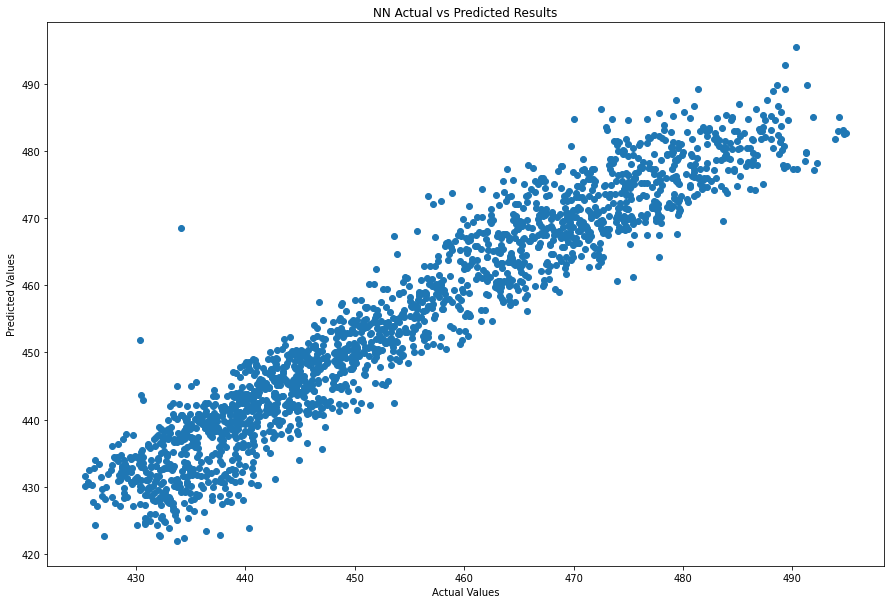

In [68]:
#Using 'matplotlib.pyplot' to plot:
#To set the size of the diagram:
plt.figure(figsize = (15, 10))

#Plot a scatter diagram for 'y_test' and 'nn_y_prediction' (actual vs predicted):
plt.scatter(y_test, nn_y_prediction)

#Label the axis:
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

#Title the diagram:
plt.title('NN Actual vs Predicted Results')

The results from the diagram are different from the first two models. 

This diagram shows the same correlation, however it shows less of a tight fit between the 'Predticed' and 'Actual' values compared to the first two.

It does shows that the predicted values match the actual values very well, but with a few more exceptions than the first two as the values are more spread out.

It shows that NN also provides accurate predictions.

### Difference between actual and predict NN values:

Showing the difference between the predicted and actual values:

In [69]:
#Put the values in a dataframe:
#Show the difference between the actual values and predicted values:
nn_pred_y_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': nn_y_prediction, 'Difference': y_test - nn_y_prediction})

#Only show the first 20 values:
nn_pred_y_df[0:20]

,Actual Values,Predicted Values,Difference
0,431.23,431.346092,-0.116092
1,460.01,462.365663,-2.355663
2,461.14,465.842023,-4.702023
3,445.90,448.993506,-3.093506
4,451.29,460.223520,-8.933520
5,432.68,429.429713,3.250287
6,477.50,471.767619,5.732381
7,459.68,457.745551,1.934449
8,477.50,475.322069,2.177931
9,444.99,444.125511,0.864489


From this table, we can see that the model is not 100% accurate, however, they are very close.

Compared to the 'Predicted' values from the LR and Lasso models, it would appear that the LR model still has  less differences between the 'Predicted' and 'Actual' values compared to the Lasso model and this model.

These results however show that this model is a strong prediction model. 

### Difference between actual and predict LR and NN values:

Lets compare both predicted values against each other:

The below shows both model's predicted values and the differences between them.

In [70]:
#Put the values in a dataframe:
#Show the difference between the actual values and predicted values:
nn_pred_y_df = pd.DataFrame({'Actual Values': y_test, 'LR Predicted Values': LR_y_prediction, 'NN predicted Values': nn_y_prediction, 'Difference': LR_y_prediction - nn_y_prediction})

#Only show the first 20 values:
nn_pred_y_df[0:20]

,Actual Values,LR Predicted Values,NN predicted Values,Difference
0,431.23,431.427616,431.346092,0.081524
1,460.01,458.561246,462.365663,-3.804416
2,461.14,462.752647,465.842023,-3.089376
3,445.90,448.595962,448.993506,-0.397544
4,451.29,457.870777,460.223520,-2.352743
5,432.68,429.693839,429.429713,0.264126
6,477.50,473.041853,471.767619,1.274234
7,459.68,456.508363,457.745551,-1.237188
8,477.50,474.340491,475.322069,-0.981577
9,444.99,446.343029,444.125511,2.217518


The above table shows that there are a few differences between the two prediction models with both showing more accuracy than the other.

### Difference between actual and predict Lasso and NN values:

In [71]:
#Put the values in a dataframe:
#Show the difference between the actual values and predicted values:
nn_pred_y_df = pd.DataFrame({'Actual Values': y_test, 'lass Predicted Values': lass_y_prediction, 'NN predicted Values': nn_y_prediction, 'Difference': lass_y_prediction - nn_y_prediction})

#Only show the first 20 values:
nn_pred_y_df[0:20]

,Actual Values,lass Predicted Values,NN predicted Values,Difference
0,431.23,431.480236,431.346092,0.134144
1,460.01,458.600269,462.365663,-3.765393
2,461.14,463.019292,465.842023,-2.822731
3,445.90,448.608113,448.993506,-0.385393
4,451.29,457.614501,460.223520,-2.609018
5,432.68,429.738402,429.429713,0.308689
6,477.50,472.733178,471.767619,0.965559
7,459.68,456.528756,457.745551,-1.216795
8,477.50,473.998371,475.322069,-1.323698
9,444.99,446.775357,444.125511,2.649846


Similarly, the above table shows that there are differences between the two prediction models with both showing more accuracy than the other.

## Measuring model accuracy:

Next we will measure the accuracy of this model and compare it with that of the Lasso model and the LR model:

In [72]:
#To predict the values of the test data by calling the '.predict' function:
#Insert the predicted values of the testing and training data:
nn_y_pred_test = nn.predict(x_test)
nn_y_pred_train = nn.predict(x_train)

### R2 train:

Calculate the r2 score on the training data for the NN model:

In [73]:
#Run the r2_score for the training data:
np.abs(r2_score(y_train, nn_y_pred_train))

0.9116106642312888

The r2 score for the LR training data was: 0.9277

The r2 score for the Lasso training data was: 0.9274

The r2 score for the NN training data is: 0.9116

The closer the r2 score is to 1.0, the better.

The results show that LR has the highest r2 score amongst the three models, so it has the better r2 score.

It shows that the LR model fits more of the dataset than the Lasso and NN models.

Next, we will run the score on the test data:

In [74]:
#Run the r2_score for the testing data:
np.abs(r2_score(y_test, nn_y_pred_test))

0.915947892479207

The r2 score for the LR training data was: 0.9325

The r2 score for the Lasso training data was: 0.9322

The r2 score for the NN training data is: 0.9170

The closer the r2 score is to 1.0, the better.

LR has the highest r2 score so it has the better r2 score.

This similarly shows that the LR model fits more of the dataset than the NN and Lasso models.

### MSE:

In [87]:
#Use the MSE metric to evaluate the model on the training data, the smaller, or closer to 0, the better:
mean_squared_error(y_train, nn_y_pred_train)

25.7145498314842

In [88]:
#Use the MSE metric to evaluate the model on the testing data, the smaller, or closer to 0, the better:
mean_squared_error(y_test, nn_y_pred_test)

24.584218998168296

LR

Train: 21.02

Test: 19.73

Lass

Train: 21.09

Test: 19.80

NN

Train: 25.71

Test: 24.58

Similarly to the LR and Lasso models, the results from this metric shows that the model is making errors when predicting an outcome using both the training and testing data. These errors are also evident in the differences between the actual outcomes compared to the predicted outcomes. The results show that the LR and Lasso models have much lower MSE scores than the NN model which suggests that the two models makes less errors than the NN model.

### MAE:

In [89]:
#Use the MAE metric to evaluate the model on the training data, the smaller, or closer to 0, the better:
mean_absolute_error(y_train, nn_y_pred_train)

4.039047195159494

In [90]:
#Use the MAE metric to evaluate the model on the testing data, the smaller, or closer to 0, the better:
mean_absolute_error(y_test, nn_y_pred_test)

3.943207035645636

LR

Train: 3.640

Test: 3.567

Lass

Train: 3.648

Test: 3.576

NN

Train: 4.039

Test: 3.943

Simialrly to the LR and Lasso models, the results above show that the model does make errors when predicting outcomes but not too much as the value is close to 0. 

The results show that the LR and Lasso models have lower MAE scores than the NN model which suggests that the they make slightly less errors with the training and testing data compared to the NN model.

### RMSE:

Next, we will calculate the RMSE to measure the average error that the Lasso model makes when predicting the outcome.

The smaller the number, the more accurate the model is at predicting:

In [75]:
np.sqrt(mean_squared_error(y_train, nn_y_pred_train))

5.0709515706112

The RMSE score for the LR training data was: 4.58

The RMSE score for the Lasso training data was: 4.59

The RMSE score for the NN training data is: 4.81

Again, the smaller the number, the more accurate the model is.

It appears that the LR model has the lowest RMSE score amongst the three models, making it more accurate in predicting the training data than the Lasso and NN model.

We will run the score on the test data:

In [76]:
np.sqrt(mean_squared_error(y_test, nn_y_pred_test))

4.958247573303323

The RMSE score for the LR training data was: 4.442

The RMSE score for the Lasso training data was: 4.449

The RMSE score for the NN training data is: 4.758

It would appear again that the LR model has a smaller RMSE score by 0.007 compared to the Lasso model, and 0.316 compared to the NN model, making it 0.007 more accurate in predicting the test data than the Lasso model, and 0.316 more accurate in predicting the test data than the NN model.

## Evaluation

The NN model's accuracy in predicting changed the more the model was run on the code.

The code was run 15 times, all with different predictions and accuracy results. The hidden layer size (HLS) was also changed during the course of the model run. Below are the results:

First run: HLS = 10,10; nn.predict = 471.18; r2 test = 0.9159; np.abs - r2 train = 0.9116; np.abs - r2 test = 0.9159; RMSE train = 5.07; RMSE test = 4.957.

Second run: HLS = 10,10; nn.predict = 471.10; r2 test = 0.9160; np.abs - r2 train = 0.9116; np.abs - r2 test = 0.9160; RMSE train = 5.06; RMSE test = 4.955.

Third run: HLS = 10,10; nn.predict = 471.11; r2 test = 0.9159; np.abs - r2 train = 0.9116; np.abs - r2 test = 0.9159; RMSE train = 5.07; RMSE test = 4.958.

Fourth run: HLS = 10,10; nn.predict = 471.27; r2 test = 0.9226; np.abs - r2 train = 0.9191; np.abs - r2 test = 0.9226; RMSE train = 4.85; RMSE test = 4.755.

Fifth run: HLS = 10,10; nn.predict = 470.39; r2 test = 0.9218; np.abs - r2 train = 0.9197; np.abs - r2 test = 0.9218; RMSE train = 4.83; RMSE test = 4.781.

Sixth run: HLS = 10,10; nn.predict = 454.30; r2 test = -0.0003; np.abs - r2 train = 0.0; np.abs - r2 test = 0.0003; RMSE train = 17.05; RMSE test = 17.105.

Seventh run: HLS = 10,10; nn.predict = 471.12; r2 test = 0.9158; np.abs - r2 train = 0.9115; np.abs - r2 test = 0.9158; RMSE train = 5.07; RMSE test = 4.95.

Eigth run: HLS = 10,10; nn.predict = 471.11; r2 test = 0.9159; np.abs - r2 train = 0.9115; np.abs - r2 test = 0.9159; RMSE train = 5.07; RMSE test = 4.95.

Nineth run: HLS = 10,10; nn.predict = 471.10; r2 test = 0.9160; np.abs - r2 train = 0.9116; np.abs - r2 test = 0.9160; RMSE train = 5.06; RMSE test = 4.95.

Tenth run: HLS = 10,10; nn.predict = 471.12; r2 test = 0.9158; np.abs - r2 train = 0.9115; np.abs - r2 test = 0.9158; RMSE train = 5.07; RMSE test = 4.96.

An error occured at this point: "STOP: TOTAL NO. of ITERATIONS REACHED LIMIT."

Eleventh run: HLS = 10,10; nn.predict = 471.11; r2 test = 0.9159; np.abs - r2 train = 0.9116; np.abs - r2 test = 0.9159; RMSE train = 5.07; RMSE test = 4.95. 

This is what caused the decision to change 'hidden_layer_size':

Twelfth run: HLS = 10,15; nn.predict = 471.12; r2 test = 0.9158; np.abs - r2 train = 0.9115; np.abs - r2 test = 0.9158; RMSE train = 5.07; RMSE test = 4.96.

Thirteenth run: HLS = 10,15; nn.predict = 471.07; r2 test = 0.9237; np.abs - r2 train = 0.9200; np.abs - r2 test = 0.9237; RMSE train = 4.82; RMSE test = 4.72.

Fourteenth run: HLS = 10,15; nn.predict = 470.73; r2 test = 0.9227; np.abs - r2 train = 0.9200; np.abs - r2 test = 0.9227; RMSE train = 4.82; RMSE test = 4.75.

Fifteenth run: HLS = 10,10; nn.predict = 470.59; r2 test = 0.9228; np.abs - r2 train = 0.9203; np.abs - r2 test = 0.9228; RMSE train = 4.81; RMSE test = 4.75.

Sixteenth run: HLS = 2; nn.predict = 471.10; r2 test = 0.9159; np.abs - r2 train = 0.9115; np.abs - r2 test = 0.9159; RMSE train = 5.07; RMSE test = 4.95.

The results above show that the more the model is run on the dataset, the less accurate the predictions become. 

This could be because of the “random weight assignment in the first iteration of the simulation. This would result in different starting points with each simulation during the training phase. A way to ensure consist of results could be to propose a fixed seed for the initial weights."

I decided to stick to the  hidden layer size of '2' as the number of inputs are small (4) so I thought it appropriate to have the number of hidden layers to be half that size. 

I know that there is no set rule on the number of hidden layers, however, from researching it can be advised that the optimal number of hidden layers should be smaller than the number of inputs.

It could be best to use a small number of hidden layers, but it is dependent on how many inputs the dataset has. Larger hidden layer sizes should be used for difficult objects, handwritten characters and face recognition problems.

Once that was done, came to realise that the reason why the reason why the model was producing different results during each run was because the 'random_state' wasn't set during the model mapping. It was set when spliting the data, and both the LR and Lasso models adopted it, but it did not transfer to the NN model. The results stayed consistant once this was set.

https://stackoverflow.com/questions/63392224/i-dont-understand-difference-between-changing-the-random-state-in-train-test-sp:

this could be because when the assigning the 'random_state' during the 'train_test_split' method, it shuffled the data differently according to 'random_state' before. This means that the train and test data looked different.

However, when assigning the 'random_state' during the NN model implementation, it used the previously assigned 'random_state' set in the splitting phase, as well as helped the NN model to generate the weights, initialize the bias, and then determine the batch sampling, thus providing more consistant and accurate results everytime the model was run on the dataset.

The result from the implementation of 'random_state = 0':

Seventeenth run: HLS = 2; nn.predict = 471.11; r2 test = 0.9159; np.abs - r2 train = 0.9116; np.abs - r2 test = 0.9159; RMSE train = 5.070; RMSE test = 4.958.

# Conclusion:

The results above show that the LR, Lasso and NN models are good models when it comes to outcome prediction, meaning they can be used in prediction as the predicted values closely match the acutal values.

The accuracy measures shows that: 

The LR model explains 92% of the training data, and 93% of the test data.

Simliarly, the Lasso model explains 92% of the training data, and 93% of our test data.

NN model explains 91% of the training and testing data. 

The Lasso model provided the closest prediction value out of all three models, second was the LR model (behind by .17), and last was the NN model.

With these results, it can be said that all three models can be used to predict the hourly electrical output of the plant (PE) using the features:

(T) - hourly average ambient variables Temperature
(AP) - Ambient Pressure
(RH) - Relative Humidity
and
(V) - Exhaust Vacuum

From the results, it can be said that the 'Predicted values' from all three models closely match the 'Actual values' more than the others. 

It would be assumed that all three models can be used to predict the (PE) based on the results gathered from the research conducted in this evaluation.

However, since the LR model's accuracy score was higher than the other two models, it would appear that in this instance, based on how the model uses the training data and testing data, it can be suggested that the LR model would be best used to predict the (PE) - the net hourly electrical energy output of the plant.